Importing all the modules

In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


Specifying the Date

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day)

Collecting the Data set

In [3]:
com_df1 = pd.DataFrame(data.DataReader('BSE/BOM532538', 'quandl', start=start, end=end )['Close'])    #UltraTechCement

In [4]:
com_df2 = pd.DataFrame(data.DataReader('BSE/BOM500387', 'quandl', start=start, end=end )['Close'])    #Shree_Cements

In [5]:
com_df3 = pd.DataFrame(data.DataReader('BSE/BOM500425', 'quandl', start=start, end=end )['Close'])    #Ambuja_Cements

In [6]:
com_df4 = pd.DataFrame(data.DataReader('BSE/BOM500410', 'quandl', start=start, end=end )['Close'])    #ACC

In [7]:
com_df5 = pd.DataFrame(data.DataReader('BSE/BOM533309', 'quandl', start=start, end=end )['Close'])    #Dalmia_Bharat

Renaming the close columns

In [8]:
UltraTechCement = com_df1.rename(columns={'Close':'UltraTechCement'})
Shree_Cements = com_df2.rename(columns={'Close':'Shree_Cements'})
Ambuja_Cements = com_df3.rename(columns={'Close':'Ambuja_Cements'})
ACC = com_df4.rename(columns={'Close':'ACC'})
Dalmia_Bharat = com_df5.rename(columns={'Close':'Dalmia_Bharat'})

Joinig all the data frames

In [9]:
close_df = (((UltraTechCement.join(Shree_Cements, how="outer")).join(Ambuja_Cements, how="outer")).join(ACC, how="outer")).join(Dalmia_Bharat,how="outer")

In [10]:
close_df

,UltraTechCement,Shree_Cements,Ambuja_Cements,ACC,Dalmia_Bharat
Date,,,,,
2018-08-14,4296.25,17276.65,226.55,1565.15,2593.45
2018-08-13,4199.30,17158.20,220.65,1517.55,2550.20
2018-08-10,4243.25,17259.90,227.45,1545.30,2647.40
2018-08-09,4301.35,17273.70,232.55,1572.10,2650.75
2018-08-08,4240.65,17227.50,230.35,1536.15,2647.90
2018-08-07,4209.85,17218.50,229.75,1538.40,2635.15
2018-08-06,4177.05,17373.90,228.15,1523.05,2643.50
2018-08-03,4175.35,17446.00,225.75,1519.35,2673.20
2018-08-02,4177.50,17423.25,228.80,1540.60,2660.80


In [13]:
import seaborn as sns
sns.set_style('whitegrid')

In [14]:
rets = close_df.pct_change()                                    #returns -- one day percent change for each of the stocks
rets.head()

,UltraTechCement,Shree_Cements,Ambuja_Cements,ACC,Dalmia_Bharat
Date,,,,,
2018-08-14,NaN,NaN,NaN,NaN,NaN
2018-08-13,-0.022566,-0.006856,-0.026043,-0.030412,-0.016677
2018-08-10,0.010466,0.005927,0.030818,0.018286,0.038115
2018-08-09,0.013692,0.000800,0.022423,0.017343,0.001265
2018-08-08,-0.014112,-0.002675,-0.009460,-0.022868,-0.001075


# Pair Plotting

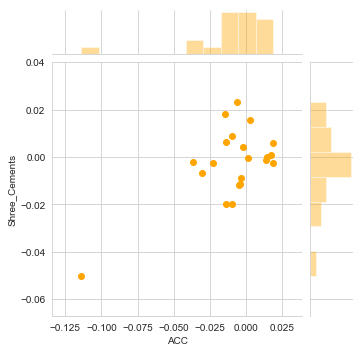

In [16]:
sns.jointplot('ACC','Shree_Cements',rets, kind='scatter',height=5, color='orange')

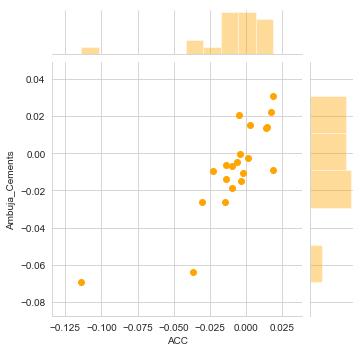

In [17]:
sns.jointplot('ACC','Ambuja_Cements',rets, kind='scatter',height=5, color='orange')

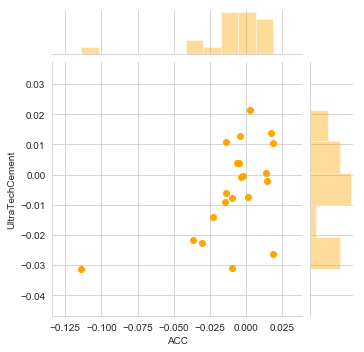

In [18]:
sns.jointplot('ACC','UltraTechCement',rets, kind='scatter',height=5, color='orange')

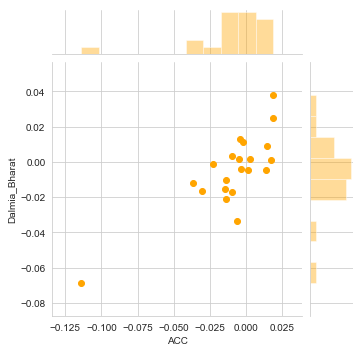

In [19]:
sns.jointplot('ACC','Dalmia_Bharat',rets, kind='scatter',height=5, color='orange')

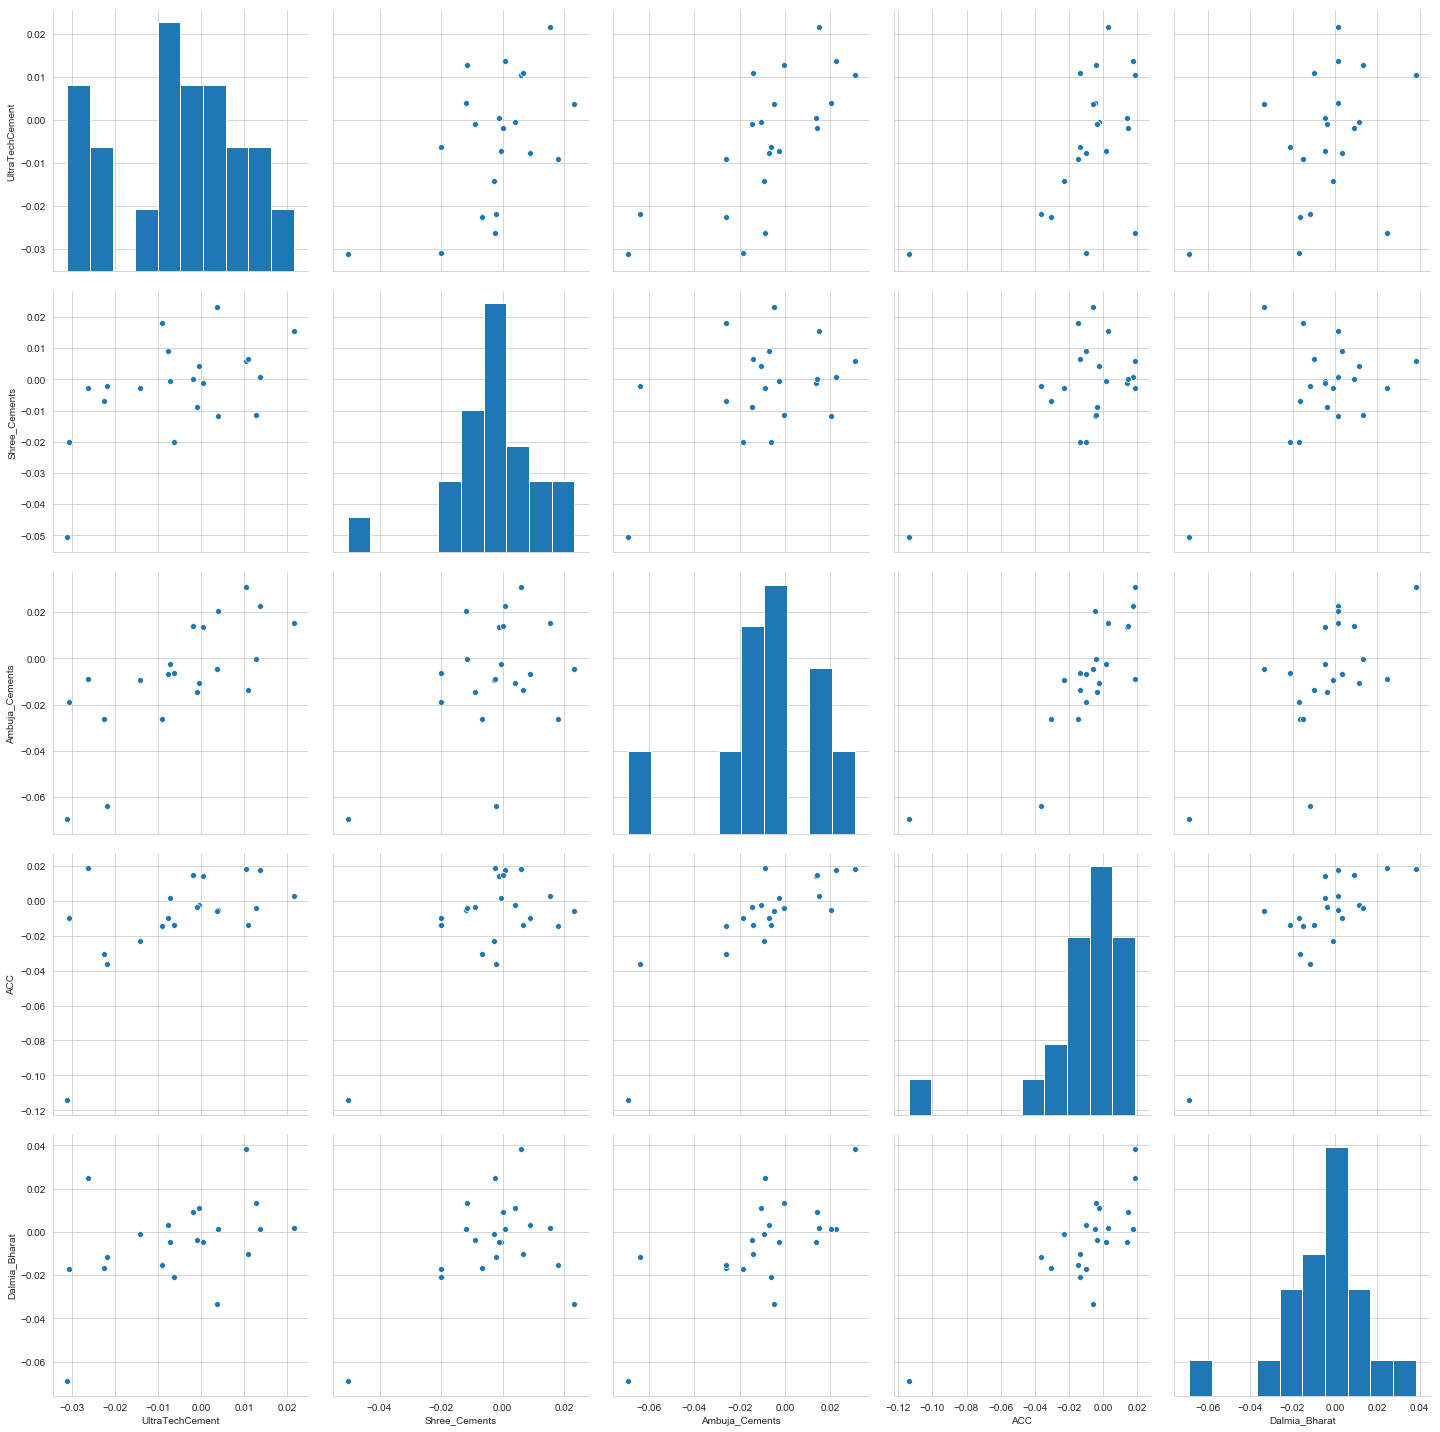

In [20]:
sns.pairplot(rets.dropna(),height=4)

# Correlation Matrix

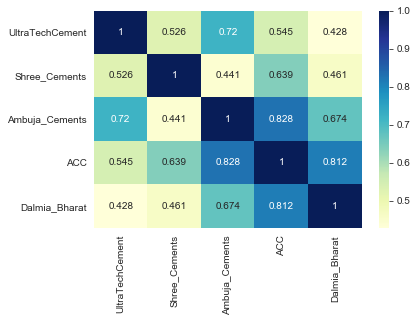

In [18]:
sns.heatmap(rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

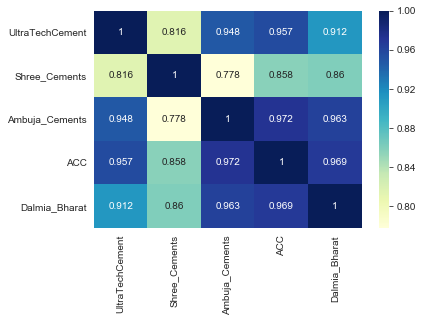

In [21]:
sns.heatmap(close_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<H2> Risk Return Analysis

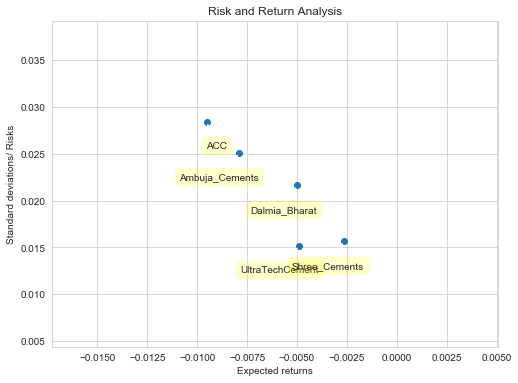

In [22]:
fig, ax = pt.subplots(figsize=(8,6))
pt.scatter(rets.mean(), rets.std())
pt.xlabel('Expected returns')
pt.ylabel('Standard deviations/ Risks')
pt.title('Risk and Return Analysis')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [23]:
import numpy as np
import statsmodels.api as sm
X=close_df[['Shree_Cements','Ambuja_Cements','UltraTechCement','Dalmia_Bharat']]
X = sm.add_constant(X)
y=close_df['ACC']
model = sm.OLS(y,X,missing='drop')             #drop rows with missing values
result = model.fit()                           #adjusts the data to model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ACC   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     171.5
Date:                Tue, 14 Aug 2018   Prob (F-statistic):           1.69e-13
Time:                        23:54:53   Log-Likelihood:                -93.523
No. Observations:                  22   AIC:                             197.0
Df Residuals:                      17   BIC:                             202.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -974.7722    220.249     -4.426      0.000   -1439.457    -510.088
Shree_Cements       0.0342      0.022      1.585      0.131      -0.011       0.080
Ambuja_Cements      3.1230      1.665      1.876      0.078      -0.389       6.635
UltraTechCement     0.1742      0.105      1.653      0.117      -0.048       0.397
Dalmia_Bharat       0.1795      0.168      1.070      0.299      -0.174       0.533
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                0.618
Skew:                          -0.398   Prob(JB):                        0.734
Kurtosis:                       3.200   Cond. No.                     9.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Plotting the Predicted values and actual values to the model

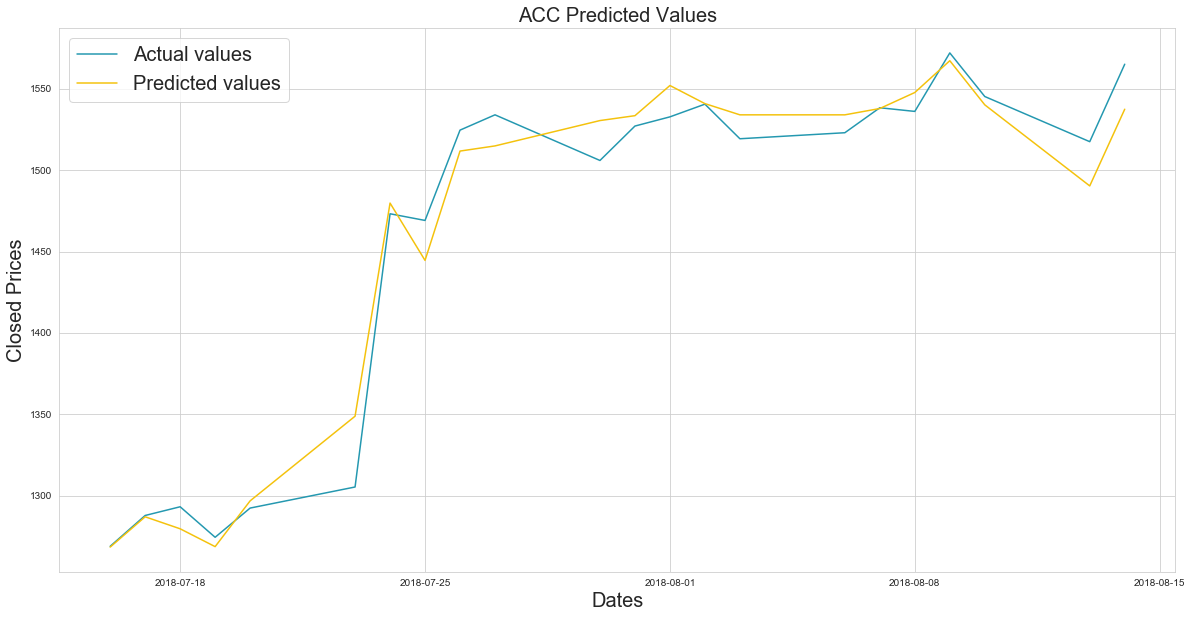

In [24]:
fig, ax = pt.subplots(figsize=(20,10))
ax.plot(y, color="#2498B0", label="Actual values")
ax.plot(result.fittedvalues, color='#f4c20d', label="Predicted values")
ax.set_xlabel('Dates',size=20)
ax.set_ylabel('Closed Prices',size=20)
ax.set_title('ACC Predicted Values',size=20)
p,q = ax.get_legend_handles_labels()
ax.legend(p, q)
pt.legend(prop={'size':20})